# Linear Regression

### Answer_1:

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# reading datafile 'student_data.csv' and storing data in records
records = pd.read_csv('student_data.csv')
records.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Duration of Sleep,Sample Question Papers Practiced,Performance
0,7,99,Yes,9,1,91
1,4,82,No,4,2,65
2,8,51,Yes,7,2,45
3,5,52,Yes,5,2,36
4,7,75,No,8,5,66


### 1(i).
##### Dependent Variable or Target :  Performance
#### Independent Variables or Features: Hours Studied,Previous Scores,Extracurricular Activities,Duration of Sleep,Sample Question Papers Practiced


### 1(ii) ExploratoryData analysis

In [39]:
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Hours Studied                     10000 non-null  int64 
 1   Previous Scores                   10000 non-null  int64 
 2   Extracurricular Activities        10000 non-null  object
 3   Duration of Sleep                 10000 non-null  int64 
 4   Sample Question Papers Practiced  10000 non-null  int64 
 5   Performance                       10000 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 468.9+ KB


In [40]:
print(records.describe())  

       Hours Studied  Previous Scores  Duration of Sleep  \
count   10000.000000     10000.000000       10000.000000   
mean        4.992900        69.445700           6.530600   
std         2.589309        17.343152           1.695863   
min         1.000000        40.000000           4.000000   
25%         3.000000        54.000000           5.000000   
50%         5.000000        69.000000           7.000000   
75%         7.000000        85.000000           8.000000   
max         9.000000        99.000000           9.000000   

       Sample Question Papers Practiced   Performance  
count                      10000.000000  10000.000000  
mean                           4.583300     55.224800  
std                            2.867348     19.212558  
min                            0.000000     10.000000  
25%                            2.000000     40.000000  
50%                            5.000000     55.000000  
75%                            7.000000     71.000000  
max        

In [41]:
records.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Duration of Sleep                   0
Sample Question Papers Practiced    0
Performance                         0
dtype: int64

In [42]:
records.tail()

,Hours Studied,Previous Scores,Extracurricular Activities,Duration of Sleep,Sample Question Papers Practiced,Performance
9995,1,49,Yes,4,2,23
9996,7,64,Yes,8,5,58
9997,6,83,Yes,8,5,74
9998,9,97,Yes,7,0,95
9999,7,74,No,8,1,64


In [43]:
df = records.drop_duplicates()
print(df)

      Hours Studied  Previous Scores Extracurricular Activities  \
0                 7               99                        Yes   
1                 4               82                         No   
2                 8               51                        Yes   
3                 5               52                        Yes   
4                 7               75                         No   
...             ...              ...                        ...   
9995              1               49                        Yes   
9996              7               64                        Yes   
9997              6               83                        Yes   
9998              9               97                        Yes   
9999              7               74                         No   

      Duration of Sleep  Sample Question Papers Practiced  Performance  
0                     9                                 1           91  
1                     4                          

In [44]:
records["Extracurricular Activities"] = records["Extracurricular Activities"].map({"Yes": 1, "No": 0})

In [45]:
records.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours Studied,10000.0,4.9929,2.589309,1.0,3.0,5.0,7.0,9.0
Previous Scores,10000.0,69.4457,17.343152,40.0,54.0,69.0,85.0,99.0
Extracurricular Activities,10000.0,0.4948,0.499998,0.0,0.0,0.0,1.0,1.0
Duration of Sleep,10000.0,6.5306,1.695863,4.0,5.0,7.0,8.0,9.0
Sample Question Papers Practiced,10000.0,4.5833,2.867348,0.0,2.0,5.0,7.0,9.0
Performance,10000.0,55.2248,19.212558,10.0,40.0,55.0,71.0,100.0


In [46]:
records.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Duration of Sleep', 'Sample Question Papers Practiced', 'Performance'],
      dtype='object')

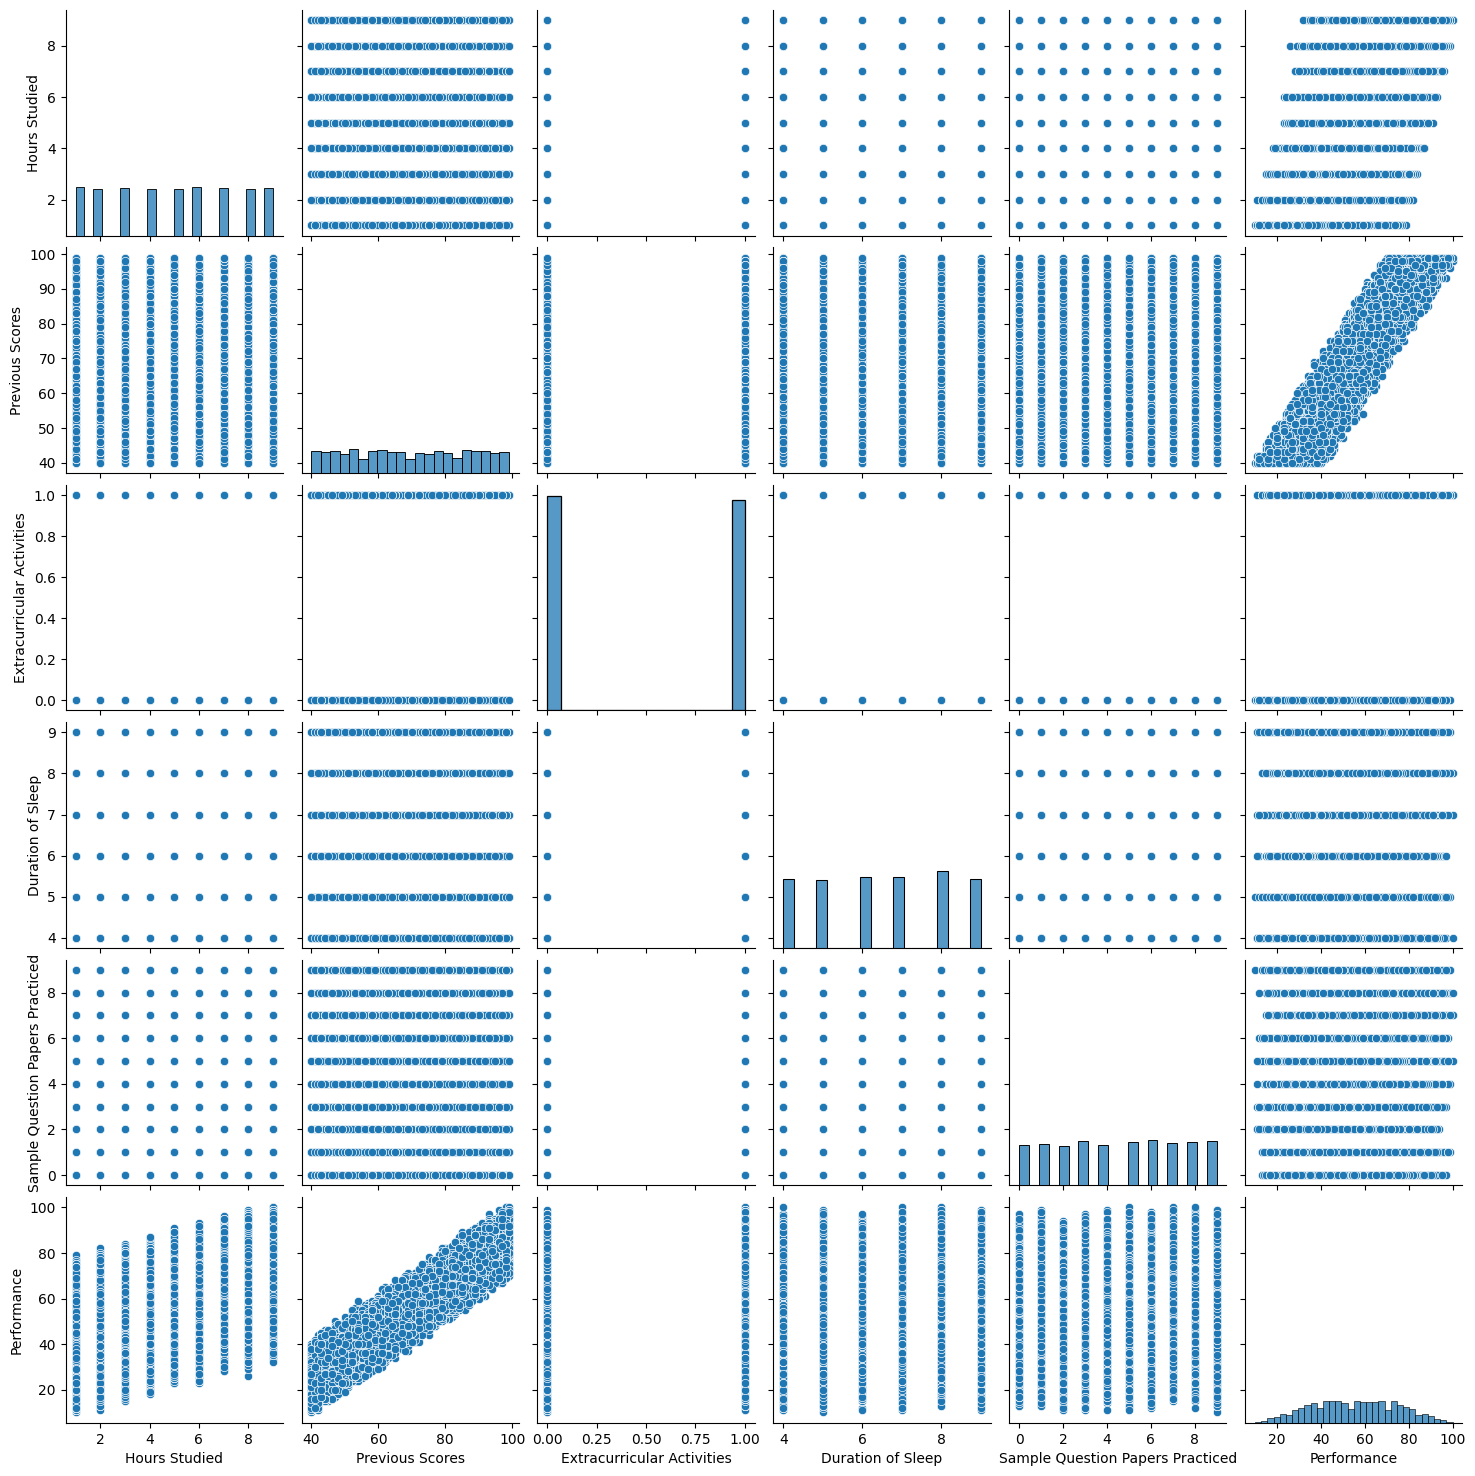

In [47]:
sns.pairplot(records)

####   Distribution of performance (the predicted value)

<Axes: ylabel='Frequency'>

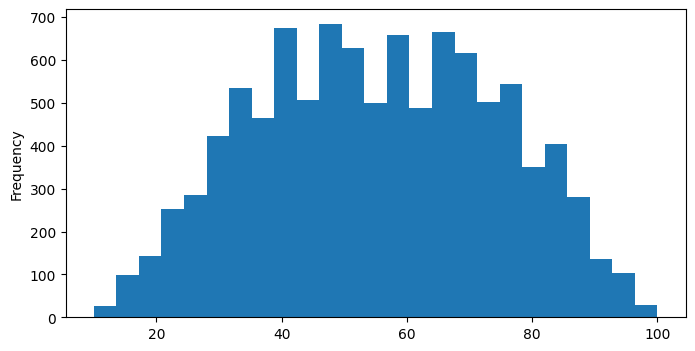

In [48]:
records['Performance'].plot.hist(bins=25,figsize=(8,4))

<Axes: ylabel='Density'>

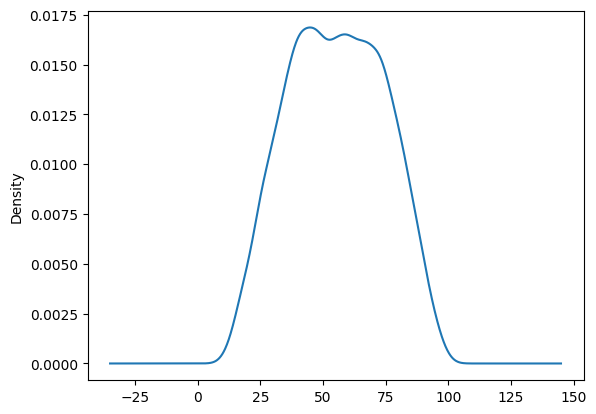

In [49]:
records['Performance'].plot.density()

In [50]:
records.corr()

,Hours Studied,Previous Scores,Extracurricular Activities,Duration of Sleep,Sample Question Papers Practiced,Performance
Hours Studied,1.000000,-0.012390,0.003873,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.008369,0.005944,0.007888,0.915189
Extracurricular Activities,0.003873,0.008369,1.000000,-0.023284,0.013103,0.024525
Duration of Sleep,0.001245,0.005944,-0.023284,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.013103,0.003990,1.000000,0.043268
Performance,0.373730,0.915189,0.024525,0.048106,0.043268,1.000000


<Axes: >

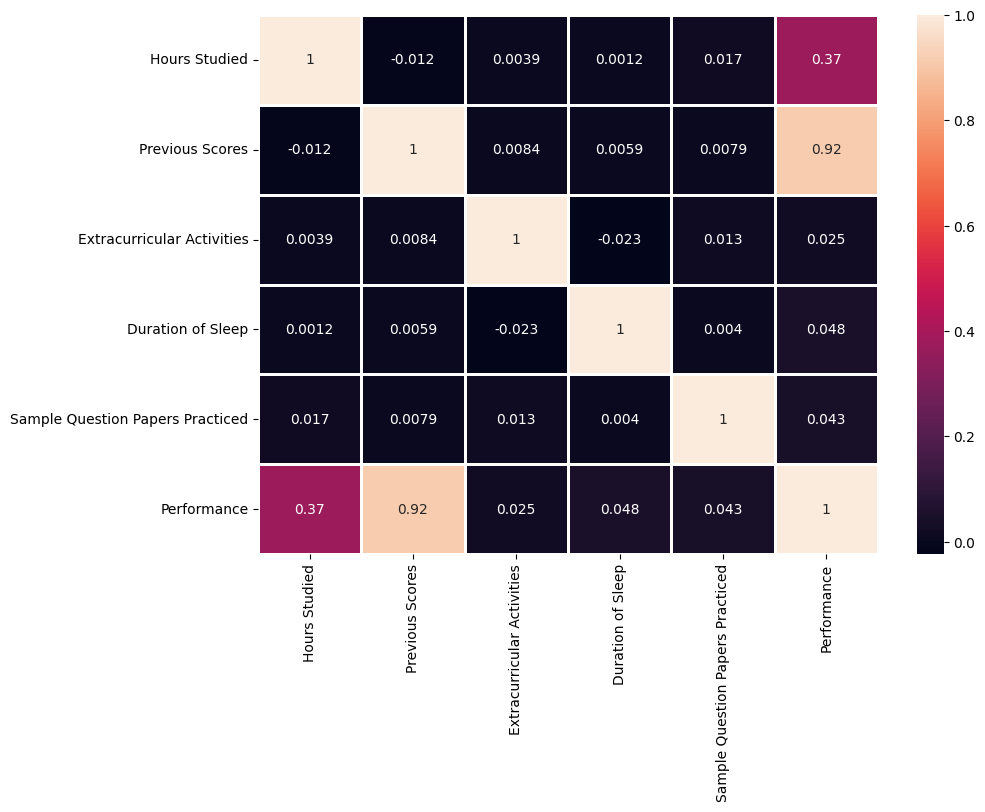

In [51]:
plt.figure(figsize=(10,7))
sns.heatmap(records.corr(),annot=True,linewidths=2)

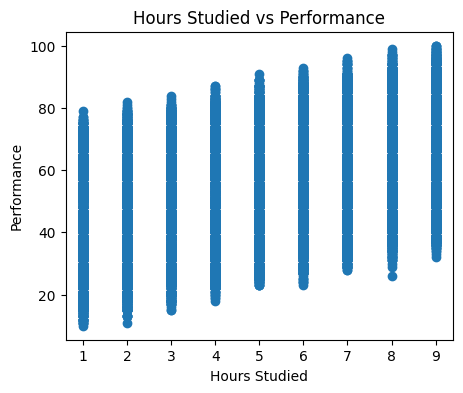

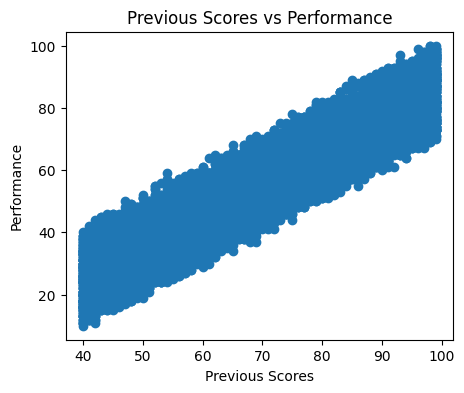

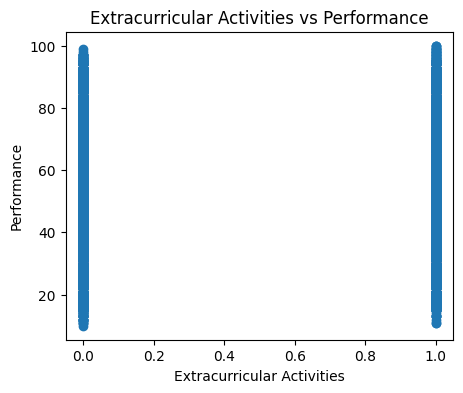

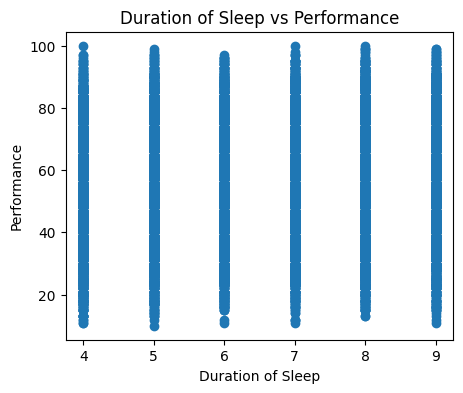

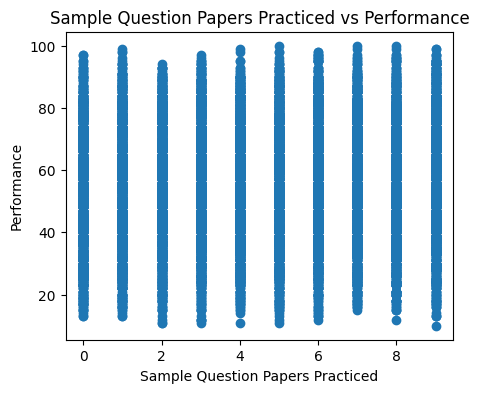

In [52]:
#Plotting Various Graphs for Independent to Dependent Values
indp_col = ["Hours Studied", "Previous Scores","Extracurricular Activities", "Duration of Sleep", "Sample Question Papers Practiced"]
for indp_col in indp_col:
    plt.figure(figsize=(5, 4))
    plt.scatter(records[indp_col], records["Performance"])
    plt.title(f"{indp_col} vs Performance")
    plt.xlabel(indp_col)
    plt.ylabel("Performance")
    plt.show()

In [53]:
# split data in X and y
X = records.drop("Performance", axis=1).values
y = records["Performance"].values

In [54]:
## First standardize and then split the data into Train & Test
#def standardize(X):
 #  mean = np.mean(X, axis=0)
#    std = np.std(X, axis=0)
  #  return (X - mean) / std

#X = standardize(X)

In [55]:
# we have split data in 80:20

test_size=0.2
shuffled_indices = np.random.permutation(len(X))
test_size = int(len(X) * test_size)
test_indices = shuffled_indices[:test_size]
train_indices = shuffled_indices[test_size:]

X_train = X[train_indices]
X_test = X[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]

In [56]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8000, 5)
X_test shape: (2000, 5)
y_train shape: (8000,)
y_test shape: (2000,)


# Linear Regression from scratch (LR-Scratch)

In [57]:
### Part 4 of Assignment

class LinearRegression:
    def __init__(self, learning_rate=0.00008,  num_iterations=150000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        self.loss_history = []

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for epoch in range(self.num_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias

            # Calculate mean squared error loss
            loss = 1/2 * np.mean((y_predicted - y)**2)
            self.loss_history.append(loss)

            # Compute gradients
            dw = (1/num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/num_samples) * np.sum(y_predicted - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
        print("LOSS=",loss)

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Initialize and fit the model
model = LinearRegression(learning_rate=0.00008, num_iterations=150000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
print(y_pred)

# Display model parameters
print("Model Weights:", model.weights)
print("Model Bias:", model.bias)

LOSS= 10.128528003729713
[76.58084374 85.87874021 35.03522968 ... 29.87492674 70.37859977
 67.29001817]
Model Weights: [ 2.37542877  0.87172754 -0.775684   -0.99759757 -0.12761649]
Model Bias: -9.064268039884467


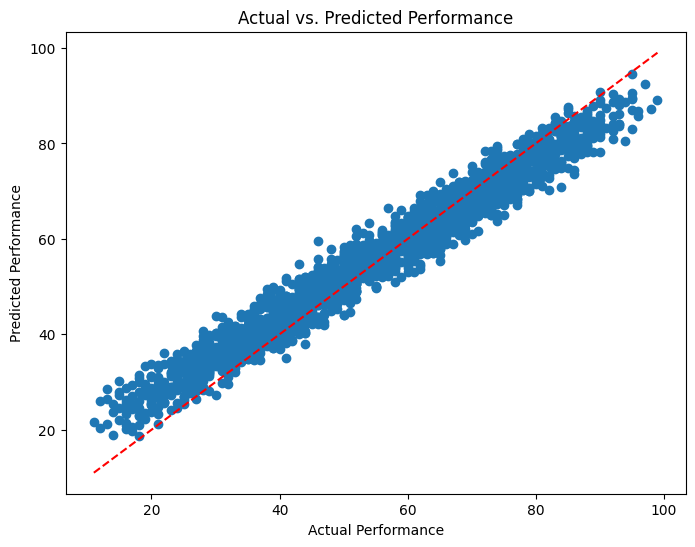

In [35]:
## Plotting the Target Vs Predication
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Performance')
plt.ylabel('Predicted Performance')
plt.title('Actual vs. Predicted Performance')
plt.show()

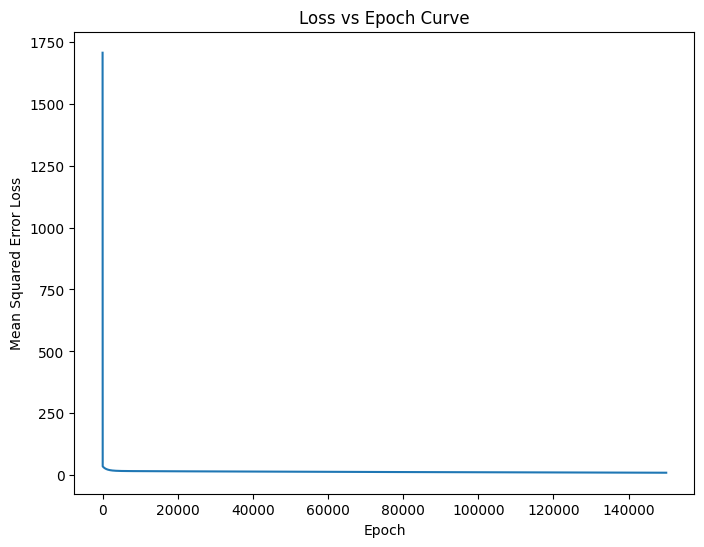

In [24]:
# Plot loss vs epoch curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, model.num_iterations + 1), model.loss_history)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.title('Loss vs Epoch Curve')
plt.show()

### Testing given data using trained LR-scratch 

In [25]:
mse = np.mean((y_pred - y_test)**2)
print("Mean Squared Error (MSE):", mse)

# Calculate R2 Score
total_sum_squares = np.sum((y_test - np.mean(y_test))**2)
residual_sum_squares = np.sum((y_test - y_pred)**2)
r2_score = 1 - (residual_sum_squares / total_sum_squares)
print("R2 Score:", r2_score)

Mean Squared Error (MSE): 19.940431024314908
R2 Score: 0.9468128266671039


In [461]:
# Provided student's data
student_dat = {
    "Hours Studied": 7,
    "Previous Scores": 95,
    "Extracurricular Activities":1,
    "Duration of Sleep": 7,
    "Sample Question Papers Practiced": 
}

# Convert student's data to a DataFrame
student_d = pd.DataFrame([student_dat])

# Encode categorical variable
#student_d["Extracurricular Activities"] = student_d["Extracurricular Activities"].map({"Yes": 1, "No": 0})

student_performance = model.predict( student_d)

#print(student_df)
# Display the predicted performance
print("Predicted Performance:", student_performance)


Predicted Performance: [1789.89056993]


In [455]:
# Student's data as a 1D array
student_data = np.array([7, 95, 1, 7, 6])

# Reshape the 1D array into a 2D array with a single row
student_data_reshaped = student_data.reshape(1, -1)

# Use your trained model to make a prediction
y_pred = model.predict(student_data_reshaped)

# The variable y_pred now contains the predicted performance based on your trained model
print("Predicted Performance:", y_pred)

Predicted Performance: [1793.26742845]


In [371]:
coefficients = [7.38103132 ,17.65651129,  0.32299379 , 0.80182377 , 0.56410807]  # Replace with your actual coefficients
intercept = 55.22086415455621  # Replace with your actual intercept

# Student's data
hours_of_study = 7
previous_score = 95
extracurricular_activities = 1  # Assuming 1 for "Yes" and 0 for "No"
duration_of_sleep = 7
sample_question_papers = 6

# Calculate predicted performance
predicted_performance = (
    coefficients[0] * hours_of_study +
    coefficients[1] * previous_score +
    coefficients[2] * extracurricular_activities +
    coefficients[3] * duration_of_sleep +
    coefficients[4] * sample_question_papers +
    intercept
)

print("Predicted Performance:", predicted_performance)

Predicted Performance: 1793.5770645445564


In [374]:


# Define the student's data
student_data = {
    "Hours Studied": 7,
    "Previous Scores": 100,
    "Extracurricular Activities": "Yes",
    "Duration of Sleep": 7,
    "Sample Question Papers Practiced": 6
}

# Extract numerical features
numerical_features = ["Hours Studied", "Previous Scores", "Duration of Sleep", "Sample Question Papers Practiced"]

# Extract the categorical feature
extracurricular_activities = student_data["Extracurricular Activities"]

# Normalize the numerical features
numerical_data = np.array([student_data[feature] for feature in numerical_features]).reshape(1, -1)
scaler = StandardScaler()
normalized_numerical_data = scaler.fit_transform(numerical_data)

# Encode the categorical feature
# Assuming "Yes" is encoded as 1 and "No" is encoded as 0
extracurricular_encoded = 1 if extracurricular_activities == "Yes" else 0

# Combine the normalized numerical features and the encoded categorical feature
normalized_student_data = np.concatenate((normalized_numerical_data, [[extracurricular_encoded]]), axis=1)
# Use the trained model to predict the student's performance
predicted_performance = model.predict(normalized_student_data)

# Display the predicted performance
print("Predicted Performance:", predicted_performance[0])

# Display the calculated metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Predicted Performance: 55.86034171399021
Mean Squared Error (MSE): 3017717.506811075
R-squared (R2) Score: 0.9889832909573145


# Linear Regression using Sklearn 

In [333]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error


In [334]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Extract features and target
X = records.iloc[:, :-1]  # Features
y = records.iloc[:, -1]   # Target variable

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

train_mse = np.mean((model.predict(X_train) - y_train) ** 2)
test_mse = np.mean((model.predict(X_test) - y_test) ** 2)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
# Print the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Make predictions on the test set
y_pred = model.predict(X_test)

# You can now evaluate the model's performance and use it for predictions.

r2 = model.score(X_test, y_test)
print("R^2 Score:", r2)

num_predictors = X_test.shape[1]
adjusted_r2 = 1 - ((1 - r2) * (len(y_test) - 1) / (len(y_test) - num_predictors - 1))
print("Adjusted R^2 Score:", adjusted_r2)



Train MSE: 4.169735849525008
Test MSE: 4.082628398521842
Coefficients: [ 7.40134079 17.63727127  0.30429076  0.81003107  0.54884171]
Intercept: 55.31150000000001
R^2 Score: 0.9889832909573145
Adjusted R^2 Score: 0.9889556663107681


In [335]:
predictions = model.predict(X_test)

Text(0, 0.5, 'Predicted Y')

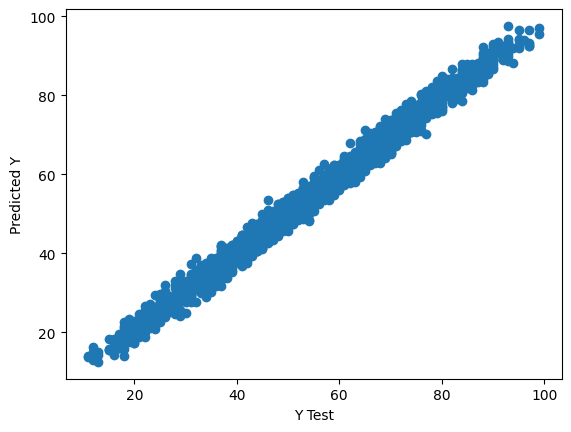

In [339]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [337]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.6111213463123022
MSE: 4.082628398521842
RMSE: 2.0205515085050028


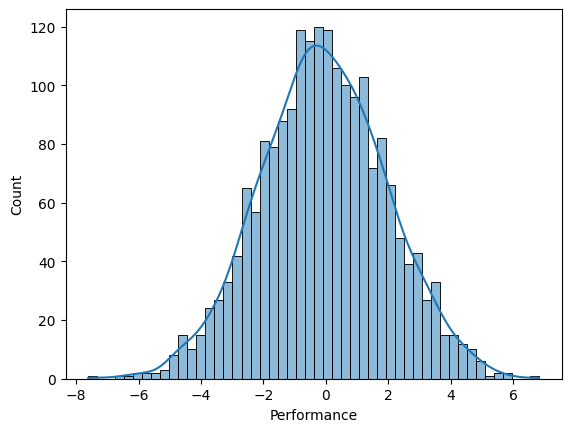

In [338]:
sns.histplot((y_test-predictions),bins=50, kde=True);

In [289]:
coeffecients = pd.DataFrame(model.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Hours Studied,7.401341
Previous Scores,17.637271
Extracurricular Activities,0.304291
Duration of Sleep,0.810031
Sample Question Papers Practiced,0.548842
